# importing libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

# data preprocessing

In [2]:
os.chdir('dogs-vs-cats/')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('valid/dog')
    os.makedirs('test/dog')
    
    os.makedirs('train/cat')
    os.makedirs('valid/cat')
    os.makedirs('test/cat')
    
    
    
    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c,'train/cat')
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c,'valid/cat')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c,'test/cat')
        
        
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c,'train/dog')
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c,'valid/dog')
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c,'test/dog')
   

In [3]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [4]:
train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
              .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 1000 images belonging to 2 classes.


In [5]:
valid_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
              .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 200 images belonging to 2 classes.


In [6]:
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
              .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 100 images belonging to 2 classes.


In [7]:
assert train_batch.n==1000
assert valid_batch.n == 200
assert test_batch.n == 100

assert train_batch.num_classes == valid_batch.num_classes==test_batch.num_classes==2

In [8]:
img,label = next(train_batch)

In [9]:
# ploting image function
def plotImage(image_Arr):
    fig,axes= plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_Arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

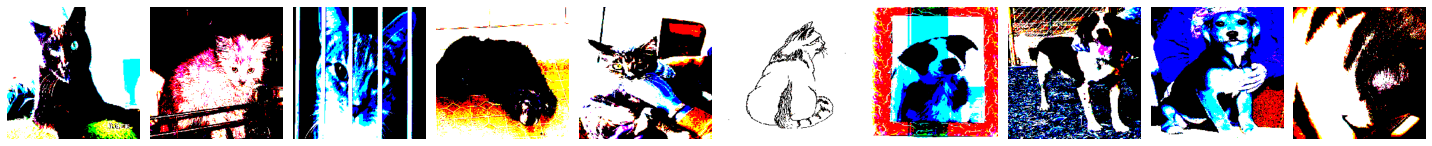

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [10]:
plotImage(img)
print(label)